 <div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue>
داده‌ساختارها و الگوریتم‌ها
</font>
<br>
ترم دوم سال تحصیلی ۱۳۹۸-۱۳۹۷
</div>
<hr/>
<font color=red size=6>
<p></p>

<div align=center>فصل ششم، بخش سوم: مرتب‌سازی سریع </div>
</font>
<div align=center>
غزل ابراهیمی، محمدامین برقعی، فاطمه باقری، مهدی قربانی، پارسا میرطاهری، یاسمین طباطبایی، آرش پوردامغانی، حسین بیگی، محمد روغنی، حسام نیک‌پی، علی شریفی
</div>
<hr>
</font></div>


<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>   
<div>
<h3 > فهرست محتویات</h3>
<ul style="margin-right: 0;">
<li><a href="#section0">مقدمه</a></li>
<li><a href="#section1">فرآیند الگوریتم</a></li>
<li><a href="#section2">افراز</a></li>
<li><a href="#section3">تقسیم و حل</a></li>
<li><a href="#section4">حالات بد مرتب‌سازی سریع</a></li>
<li><a href="#section5">حالات خوب مرتب‌سازی سریع</a></li>
</ul>
</div>




<div style="direction:rtl;line-height:300%;"><font size=5>
<font id="section0" size=5><h1>
مقدمه
</h1></font>
    <p></p>
  <font color=#595959 size=5>
    ابتدا می خواهیم بررسی کنیم که چرا از الگوریتم مرتب سازی سریع استفاده می‌شود.شما تا کنون با مرتب‌سازی ادغامی آشنا شده‌اید  و فهمیدید که مرتبه زمانی اجرای آن از $O(nlogn)$ است و همان طور که در مبحث درخت تصمیم فرا گرفته‌اید، این بهترین مرتبه زمانی ممکن در حالت میانگین است.حال سوالی که مطرح می‌شود این است که چه نیازی به الگوریتم دیگری است؟
<br>
جواب این مسئله را می‌توان در سه نکته زیر خلاصه کرد:
<ol>
    <li> مرتب‌سازی سریع، یک الگوریتم درجا است، به همین دلیل حافظه کمتری مصرف می‌کند، هچمنین در زمان پیاده‌سازی نیاز کمتری به دسترسی به RAM دارد.  </li>
    <li> در حالت میانگین، ضرایب ثابت آن کمتر است، شما می‌توانید در نمودار زیر مقایسه زمان اجرای چند الگوریتم را در حالت میانگین ببینید. </li>
    <li> پیاده‌سازی آن آسان است. </li>
<ol>

</font></div>

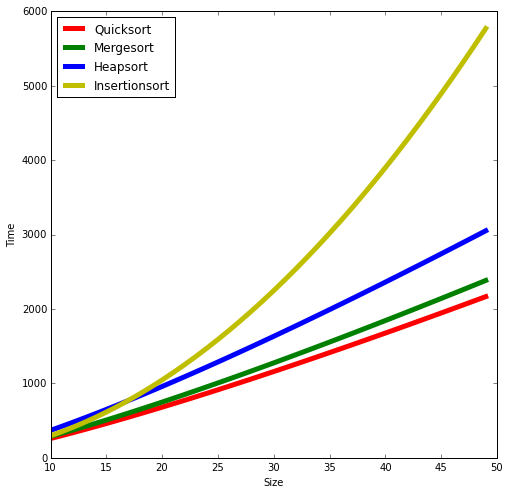

In [1]:
%matplotlib inline
from matplotlib.pyplot import *

import math 

def plot2(N):
    figure(figsize=(8, 8))
    xlabel("Size")
    ylabel("Time")
    y = [11.667*(n+1)*math.log(n)- 1.74*n - 18.74 for n in N]
    plot(N, y, 'r', label='Quicksort',linewidth=5)
    y = [12.5*n*math.log(n) for n in N]
    plot(N, y, 'g', label='Mergesort',linewidth=5)
    y = [16*n*math.log(n)+0.01*n for n in N]
    plot(N, y, 'b', label='Heapsort',linewidth=5)
    y = [2.25*pow(n,2)+7.75*n-3*math.log(n) for n in N]
    plot(N, y, 'y', label='Insertionsort',linewidth=5)
    legend(loc=2)
from random import randrange
max_N = 50
N = range(10, max_N, 1)
plot2(N)

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=5 id='section1'> 
    <h1>
فرآیند الگوریتم
</h1></font>
    <p></p>

برای بررسی مرتب‌سازی سریع برای آرایه $A[p..r]$ دو گام کلی زیر را داریم: 
<ol>
<font size=5>
    <li> افراز: آرایه به سه بخش (ممکن است بخشی ها خالی باشند)  $A[p..q-1]$ و $A[q]$ و $A[q+1,..r]$ افراز می‌شود به طوری که که هر عنصر $A[p..q-1]$ کمتر یا مساوی $A[q]$ و $A[q+1..r]$ باشد. عنصر $A[q]$ را عنصر محور این آرایه می‌نامیم.  </li>
    <li> تقسیم و حل: هر یک از بخش‌های $A[p..q-1]$ و $A[q+1..r]$ را با فراخوانی تابع بازگشتی مرتب‌سازی سریع، مرتب می‌کنیم. بنابراین در نهایت آرایه اصلی نیز مرتب خواهد بود. </li>
</font>
</ol>
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=5 id='section2'> 
    <h1>
افراز
</h1></font>
<p></p>
    گیف زیر روند افزار در مرتب سازی سریع را نشان می دهد. 
<img src="src/images/Partition.gif" style="float:center; width:75%">
    </font></div>

<div style="direction:rtl;line-height:300%"><font face="XB Zar" size=5>
    قطعه کد زیر تابع افزار (partition) در مرتب سازی سریع است. برای بررسی درستی این تابع به این نکته توجه کنید که در طول اجرای حلقه خط چهارم، همه اعداد سمت چپ leftPointer از محور در نظر گرفته کوچک‌تر هستند و همه اعداد سمت راست rightPointer هم بزرگتر یا مساوی محور هستند . 
<br>
همچنین این حلقه پایان پذیر است، چون در هر مرحله  از اجرای حلقه، فاصله اشاره‌گرها حداقل یکی کم می‌شود. 

</div>

In [5]:
def partition(A,left, right):
    leftPointer = left
    rightPointer = right-1
    swap(A[right], A[rand(left,right)])
    pivot = A[right]
    while True:
        while leftPointer<=rightPointer and A[leftPointer] <= pivot :
            leftPointer=leftPointer+1
        while rightPointer >= leftPointer and A[rightPointer] > pivot :
             rightPointer=rightPointer-1
        if leftPointer >= rightPointer :
             break
        else :
            A[leftPointer],A[rightPointer] = A[rightPointer], A[leftPointer] 

    A[leftPointer], A[right] = A[right], A[leftPointer]

    return leftPointer, pivot

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=5 id='section3'> 
    <h1>
تقسیم و حل
</h1></font>
<p></p>
 روند بازگشتی مرتب سازی سریع(تقسیم و حل) در گیف زیر نمایان است.
<img src="src/images/Divide_Conquer.gif" style="float:center; width:75%">
    </font></div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
تابع بازگشتی مرتب سازی سریع را در قطعه کد زیر مشاهده می کنید. درستی این تابع را می‌توان با استقرا روی طول آرایه ثابت کرد. 
به این صورت که فرض می کنیم، هر آرایه ای با طول کمتر از n را می‌توان با این تابع مرتب کرد، حال برای آرایه با طول n  توسط محور انتخاب شده ، آرایه را به دو تکه تقسیم می‌کنیم و هر تکه را به صورت بازگشتی مرتب‌ می‌کنیم.
حالت پایه الگوریتم نیز آرایه ‌هایی با طول یک و یا صفر است که در شرط خط پنجم بررسی شده‌است.
</font></div>

In [1]:
A=[19,97,22,50,93,31,72,11,46]

def quickSort(left, right):
    if right <= left:
        return
    index, pivot = partition(A,left, right)
    print("left=",left,"right=",right,"pivot=",pivot,"index=",index)
    print(A)
    print("")
    quickSort(left,index-1)
    quickSort(index+1,right) 
global A
quickSort(0,8)


NameError: name 'partition' is not defined

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=5 id='section4'> 
    <h1>
حالات بد مرتب سازی سریع
</h1></font>
<p></p>
گرچه در ابتدای متن اشاره کردیم که حالت میانگین مرتب‌سازی سریع بهتر از سایر الگوریتم های مبتنی بر مقایسه است، اما حالات خاصی نیز وجود دارند که مرتبه زمانی اجرای الگوریتم از $\Theta(n^2)$ می‌شود.
<br>
این حالات هنگامی رخ می‌دهند که افراز متوازن نباشد، بدین معنا که یکی از بخش‌های حاصل از افراز $k$ عضوی باشد که $k$ عدد ثابتی است که باعث می‌شود حل زیربخش دیگر، که $n-k$ عضو دارد، تقریبا به اندازه حالت ابتدایی مشکل باشد. 
<br>
یک مثال بارز از این موضوع، آرایه مرتب‌شده‌است، که همانطور که در شکل زیر مشاهده می‌کنید، یکی از بخش‌ها همواره صفر عضوی است، بنابراین برای رابطه بازگشتی زمان اجرا خواهیم داشت:
<br>
<div align=center>
$T(n)=T(n-1)+T(0)+\theta(n)$
<br>
$=T(n-1)+\theta(n)$
</div>
که به راحتی می‌توان نشان‌داد از $\theta(n^2)$ است.
<br>
<img src="src/images/n^2.gif" style="float:center; width:60%">
 یک روش برای بهبود شرایط در این وضعیت‌ها استفاده از الگوریتم‌های ترکیبی است. برای مثال الگوریتم مرتب سازی درون‌گرا(introsort)که ترکیبی از الگوریتم‌های مرتب سازی تصادفی و هرمی است.این الگوریتم با فراخوانی مرتب‌سازی سریع شروع می‌شود و هنگامی که بخش بازگشتی مرتب‌سازی سریع به عمق مشخصی(متناسب با $logn$) رسید، الگوریتم مرتب‌سازی هرمی را فراخوانی می‌کند.
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=5 id='section5'> 
    <h1>
حالات خوب مرتب سازی سریع
</h1></font>
<p></p>
نکته کلیدی که برای این حالات وجود دارد، متوازن بودن افراز است، بدین معنا که دو بخش حاصل از افراز، به صورتی باشند که  <b><i>نسبت</i></b>  اعضای دوبخش یک عدد ثابت باشد.این موضوع باعث می‌شود که بخش‌های ما به اندازه کافی کوچک شوند که در نتیحه زمان کلی اجرای الگوریتم کمتر شود.  
<br>
مثال این حالت، شبیه مرتب‌سازی ادغامی است، یعنی تعداد اعضای بخش‌های حاصل از افراز برابر با  &lfloor;$(n-1)/2$&rfloor; و   &lceil;$(n-1)/2$&rceil; است که رابطه بازگشتی زمان اجرای زیر را نتیجه می دهد:
<div align=center>
$T(n)=2T((n-1)/2)+\theta(n)$
</div>
که به راحتی می‌توان نشان داد از $\theta(nlogn)$ است.
<br>
   </font></div>